# Forecasting Models

ARIMA
SLR
Lasso
FBProphet[In a different notebook]

In [274]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pyflux as pf
from statsmodels.tsa.stattools import acf,pacf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('final.csv')

In [7]:
df.head()

,Unnamed: 0,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),...,"Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
0,1960 [YR1960],76.999045,41.312839,1.529810e+10,5.440000e+08,22.071925,12.116774,4.571559e+08,15.000062,2.527487,...,450547675.0,369791510.0,82.076,38.782462,2.035209e+09,6.745366e+08,423000000.0,11.296833,80756165.0,17.924
1,1961 [YR1961],78.007106,40.387402,1.584496e+10,1.122000e+09,21.501873,12.659441,-3.809357e+08,14.725330,2.570333,...,459642166.0,376759491.0,81.968,38.325875,2.303808e+09,6.663571e+08,418000000.0,10.261163,82882675.0,18.032
2,1962 [YR1962],79.187531,38.371335,1.617792e+10,3.710000e+08,21.930703,18.031311,1.965947e+08,15.186626,2.663693,...,469077191.0,383620708.0,81.782,39.935845,2.674898e+09,5.127918e+08,265000000.0,10.200790,85456483.0,18.218
3,1963 [YR1963],80.304725,39.319751,1.903938e+10,6.470000e+08,21.116283,16.821091,-3.076154e+08,14.641317,2.742170,...,478825602.0,390697750.0,81.595,38.095180,3.294071e+09,6.078625e+08,360000000.0,10.187338,88127852.0,18.405
4,1964 [YR1964],80.998952,41.187738,2.326295e+10,9.200000e+08,19.806398,22.411741,-2.171540e+08,13.448422,3.108394,...,488848139.0,397946828.0,81.405,36.340821,3.758864e+09,4.991451e+08,251000000.0,9.410549,90901311.0,18.595


In [8]:
df = df.rename({'Unnamed: 0':'year'},axis = 1)

In [9]:
df.dtypes

year                                                              object
Age dependency ratio (% of working-age population)               float64
Agriculture, forestry, and fishing, value added (% of GDP)       float64
Agriculture, forestry, and fishing, value added (current US$)    float64
Arms imports (SIPRI trend indicator values)                      float64
                                                                  ...   
Total reserves (includes gold, current US$)                      float64
Total reserves minus gold (current US$)                          float64
Trade (% of GDP)                                                 float64
Urban population                                                 float64
Urban population (% of total population)                         float64
Length: 68, dtype: object

In [10]:
df.year[0]

'1960 [YR1960]'

In [11]:
year = []
for i in df.year:
     year.append(i.split(' ')[0])
df.year = year

In [12]:
df.year

0     1960
1     1961
2     1962
3     1963
4     1964
      ... 
56    2016
57    2017
58    2018
59    2019
60    2020
Name: year, Length: 61, dtype: object

In [13]:
df['year'] = pd.to_datetime(df['year'],dayfirst=True)

In [14]:
columns = list(df.columns)

In [275]:
def adfTest(dataframe, column_name):
    result = adfuller(dataframe[column_name])
    print(i)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[0] < result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")
    print('\n')

In [276]:
for i in columns[1:]:
    adfTest(df, i)

Age dependency ratio (% of working-age population)
ADF Statistic: 1.612859
p-value: 0.997896
Failed to Reject Ho - Time Series is Non-Stationary


Agriculture, forestry, and fishing, value added (% of GDP)
ADF Statistic: -0.730862
p-value: 0.838593
Failed to Reject Ho - Time Series is Non-Stationary


Agriculture, forestry, and fishing, value added (current US$)
ADF Statistic: 4.150069
p-value: 1.000000
Failed to Reject Ho - Time Series is Non-Stationary


Arms imports (SIPRI trend indicator values)
ADF Statistic: -2.674592
p-value: 0.078539
Failed to Reject Ho - Time Series is Non-Stationary


Broad money (% of GDP)
ADF Statistic: 0.868799
p-value: 0.992669
Failed to Reject Ho - Time Series is Non-Stationary


Broad money to total reserves ratio
ADF Statistic: -2.442009
p-value: 0.130229
Failed to Reject Ho - Time Series is Non-Stationary


Changes in inventories (current US$)
ADF Statistic: -1.159013
p-value: 0.690974
Failed to Reject Ho - Time Series is Non-Stationary


Claims on ce

Services, value added (% of GDP)
ADF Statistic: 0.488221
p-value: 0.984511
Failed to Reject Ho - Time Series is Non-Stationary


Taxes less subsidies on products (current US$)
ADF Statistic: 2.511680
p-value: 0.999054
Failed to Reject Ho - Time Series is Non-Stationary


Total reserves (includes gold, current US$)
ADF Statistic: 4.328679
p-value: 1.000000
Failed to Reject Ho - Time Series is Non-Stationary


Total reserves minus gold (current US$)
ADF Statistic: 4.463072
p-value: 1.000000
Failed to Reject Ho - Time Series is Non-Stationary


Trade (% of GDP)
ADF Statistic: -0.641230
p-value: 0.861391
Failed to Reject Ho - Time Series is Non-Stationary


Urban population
ADF Statistic: 1.774073
p-value: 0.998296
Failed to Reject Ho - Time Series is Non-Stationary


Urban population (% of total population)
ADF Statistic: 1.471661
p-value: 0.997417
Failed to Reject Ho - Time Series is Non-Stationary




# Time-Series Models

# ARIMA

In [17]:
first_diff = df['GDP per capita (current US$)'].diff()[1:]
second_diff = first_diff.diff()[1:]

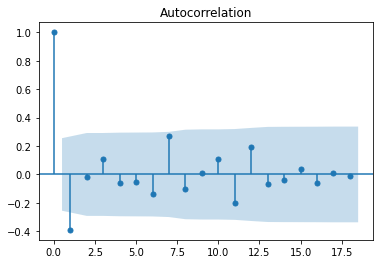

In [18]:
plot_acf(second_diff)
plt.show()

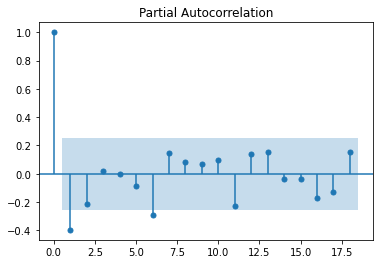

In [19]:
plot_pacf(second_diff)
plt.show()

In [20]:
train = df['GDP per capita (current US$)'][:int(len(df)*5/6)]

In [21]:
arima = ARIMA(train,order = (2,2,2))

In [22]:
arima = arima.fit()

In [23]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ARIMA Model Results                                    
===========================================================================================
Dep. Variable:     D2.GDP per capita (current US$)   No. Observations:                   48
Model:                              ARIMA(2, 2, 2)   Log Likelihood                -239.871
Method:                                    css-mle   S.D. of innovations             34.671
Date:                             Sun, 05 Dec 2021   AIC                            491.742
Time:                                     23:40:15   BIC                            502.969
Sample:                                          2   HQIC                           495.984
                                                                                           
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.2517      0.596      2.102      0.036       0.085       2.419
ar.L1.D2.GDP per capita (current US$)     0.0866      0.388      0.223      0.823      -0.674       0.847
ar.L2.D2.GDP per capita (current US$)     0.4242      0.150      2.818      0.005       0.129       0.719
ma.L1.D2.GDP per capita (current US$)    -1.0849      0.405     -2.680      0.007      -1.878      -0.291
ma.L2.D2.GDP per capita (current US$)     0.0849      0.399      0.213      0.831      -0.697       0.867
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4368           +0.0000j            1.4368            0.0000
AR.2           -1.6409           +0.0000j            1.6409            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           11.7743           +0.0000j           11.7743            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
test_data,se,conf = arima.forecast(int(len(df)*1/6),alpha = 0.02)
test_data

array([1127.24960095, 1200.9431897 , 1246.29117659, 1310.32939206,
       1364.57481474, 1426.51265904, 1485.57509352, 1548.26389028,
       1610.65939376, 1675.18010833])

In [25]:
actual = df['GDP per capita (current US$)'][len(train)+1:]

In [55]:
mean_squared_error(actual,test_data),mean_absolute_error(actual,test_data)

(116849.84323856281, 324.71033389511604)

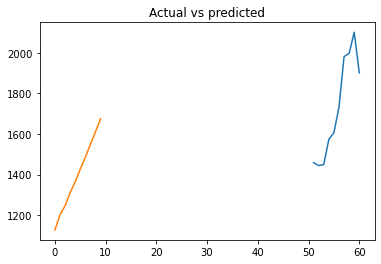

In [353]:
plt.title("Actual vs predicted")
plt.plot(actual)
plt.plot(test_data)

# Regression Models

In [248]:
x = df[[i for i in columns if i not in['GDP per capita (current US$)','year']]]
y = df['GDP per capita (current US$)']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/6,random_state=24)

In [268]:
lr = LinearRegression().fit(x_train,y_train)

In [296]:
pred = lr.predict(x_test)

In [297]:
pred

array([1361.47456252,  361.24095355,  627.9542286 ,  146.70504602,
        320.47035201,  458.07579843,  232.48592394,   79.1392308 ,
        161.61354419,  102.53254493,  459.70167081])

In [298]:
lr.coef_

array([-5.53685097e+00,  1.43248021e+00,  2.79747447e-10,  3.42380289e-09,
        3.61255057e+00,  6.62738400e-01, -3.36453629e-09, -6.78858612e+00,
       -7.14894654e+00, -3.34983779e-01, -3.13189172e-01, -3.48981233e+00,
       -3.03238894e-03, -3.86054947e+00,  3.03239075e-03,  1.91716891e+00,
       -1.08632173e+00, -1.46005805e-07,  3.07773932e+00, -2.65860890e+00,
       -1.29399347e+01,  6.54454923e+00, -5.50093517e-04, -1.35438225e+00,
       -2.20844606e+00,  6.10313376e-01, -1.95189069e+00, -1.69718520e+00,
        2.37202007e-01, -3.38358519e-09, -2.56408301e-01, -6.10313373e-01,
        1.63162533e+01,  5.71017634e+00, -4.59233573e+00, -5.50094971e-04,
        3.37389909e-01,  3.03238880e-03, -1.73685374e+01,  6.51814780e-09,
        1.97866220e-01,  1.91574793e+01, -5.73029602e-09,  1.33734357e-10,
        7.47579776e-11,  3.87708079e+00,  3.29109953e+00, -3.50944354e-09,
       -2.95174799e-01,  1.35438224e+00,  1.79685504e-06,  1.16877887e+00,
       -5.83115437e-05,  

In [299]:
mean_squared_error(pred,y_test),mean_absolute_error(pred,y_test)

(83.39058757820041, 7.523889800825165)

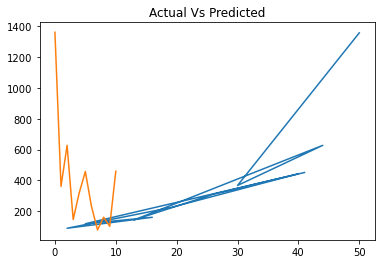

In [300]:
plt.title("Actual Vs Predicted")
plt.plot(y_test)
plt.plot(pred)

# Lasso

In [347]:
model = Lasso(alpha=0.27)

In [348]:
model.fit(x_train,y_train)

Lasso(alpha=0.27)

In [349]:
pred2 = model.predict(x_test)

In [350]:
model.coef_

array([-2.89237181e+01, -5.65470621e+00,  2.07149338e-09,  4.52641996e-09,
        1.64432726e+00,  3.60883699e+00,  6.26964164e-10, -5.68430252e+00,
       -1.68258056e-02, -8.14562863e-01, -0.00000000e+00, -8.48958992e-01,
        4.44431636e-10, -0.00000000e+00, -8.16872990e-10,  3.17208569e+00,
        2.11061469e-11, -1.67382821e-06, -0.00000000e+00,  2.02818844e-11,
       -1.54504037e+00, -1.27649025e+01,  1.01967800e-11,  8.85557664e-11,
       -2.02523299e+00,  8.53275922e-11, -6.27677010e-01, -1.28536851e-11,
       -3.92408716e-01,  1.79426554e-11,  0.00000000e+00, -7.04329063e-12,
       -1.40952914e+00,  8.67511466e-11,  1.74322268e+00,  3.11883848e-11,
       -4.24392615e+00,  4.24827409e-11, -1.71243982e+00,  3.45106171e-10,
       -2.43163611e-01, -4.00449229e+00,  9.85286126e-11, -1.68484899e-10,
       -3.18354171e-10,  2.30502421e+00,  3.05972696e+01, -2.71538101e-09,
       -4.57648854e-01, -1.61372702e-09, -1.72034485e-07, -4.52971094e+01,
        8.74441540e-07, -

In [351]:
mean_squared_error(pred2,y_test),mean_absolute_error(pred2,y_test)

(84.404795506386, 7.990887305646873)

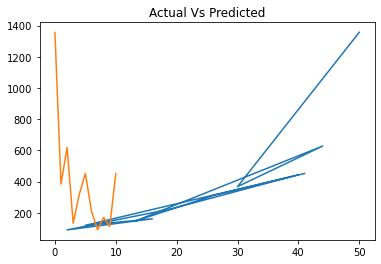

In [352]:
plt.title("Actual Vs Predicted")
plt.plot(y_test)
plt.plot(pred2)